In [26]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Finding accuracy of majority vote of random classifiers:

In [27]:
import random
from statistics import mode

accuracies = []
for i in range(10000):
    vote = [0] * 6
    for j in range(100):
        vote[random.randint(0,5)] += 1
    accuracies.append(vote.index(max(vote)) == 3)
print(sum(accuracies)/len(accuracies))

0.1659


Include a plot of training accuracy and validation accuracy as a function of epoch step for your best settings (replace blank.png with your file name in the box). You can create a python notebook to aid in plotting these figures.

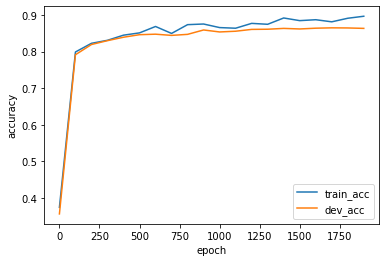

In [28]:
epochs, train_acc, dev_acc = np.loadtxt('densenet_epoch_output.csv', delimiter=',', unpack=True)

plt.plot(epochs, train_acc, label='train_acc')
plt.plot(epochs, dev_acc, label='dev_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

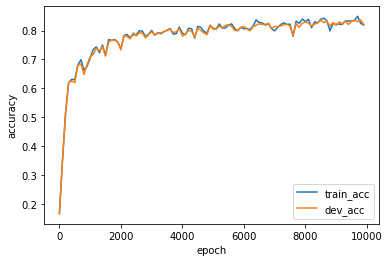

In [29]:
epochs, train_acc, dev_acc = np.loadtxt('convnet_epoch_output.csv', delimiter=',', unpack=True)

plt.plot(epochs, train_acc, label='train_acc')
plt.plot(epochs, dev_acc, label='dev_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

Locate some success cases and some failure cases in the validation set. (In other words, find some images that were correctly classified by your best model, and some that were misclassified by your best model).

In [30]:
import numpy as np
import torch
import torch.nn.functional as F
from utils.accuracies import (accuracy)
from main_bestmodel import BestModel

# MODIFICATIONS FOR 1.8
DEV_IMAGES = np.load("datasets/fruit_dev_images.npy")
DEV_LABELS = np.load("datasets/fruit_dev_labels.npy")

def normalize(img):
    flat = img.flatten()
    norm = (flat - np.mean(flat)) / np.std(flat)
    return norm

flat_dev_imgs = np.array([normalize(img) for img in DEV_IMAGES])

model = torch.load("model_files/bestmodel.pt")
# dev_acc, dev_loss = accuracy(model, flat_dev_imgs, DEV_LABELS)

x = torch.from_numpy(flat_dev_imgs.astype(np.float32))
y = torch.from_numpy(DEV_LABELS.astype(np.int))
logits = model(x)
loss = F.cross_entropy(logits, y)
y_pred = torch.max(logits, 1)[1]

correct_class = DEV_IMAGES[y_pred == y]
correct_lab = DEV_LABELS[y_pred == y]
incorrect_class = DEV_IMAGES[y_pred != y]

<ipython-input-30-5d2285f9fa0f>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = torch.from_numpy(DEV_LABELS.astype(np.int))


Printing 10 correctly classified examples:


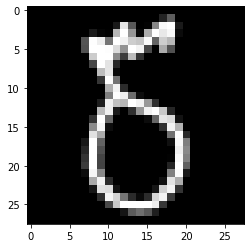

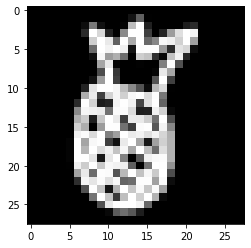

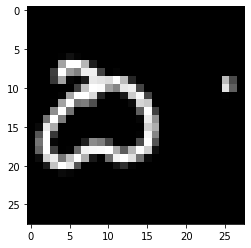

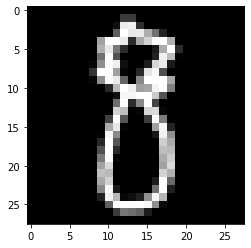

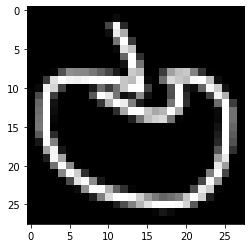

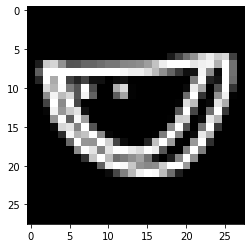

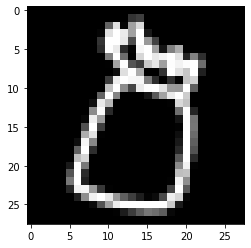

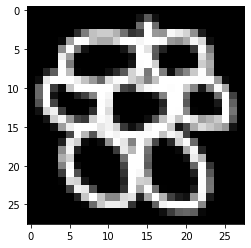

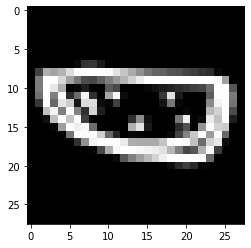

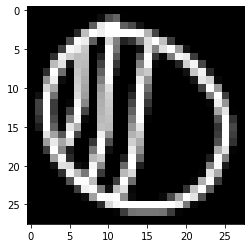

In [31]:
print('Printing 10 correctly classified examples:')
for i in range(10):
    plt.figure()
    plt.imshow(correct_class[i])
    plt.set_cmap('gray')

Printing 10 incorrectly classified examples:


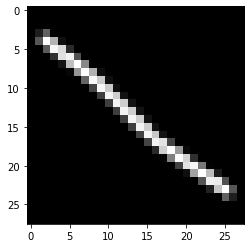

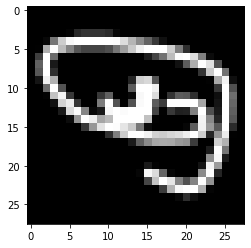

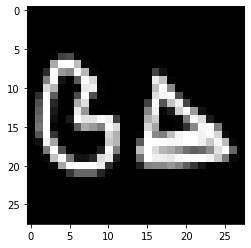

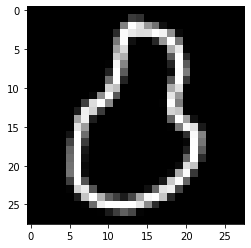

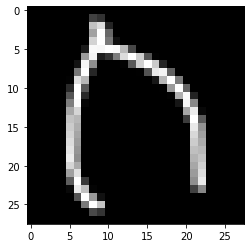

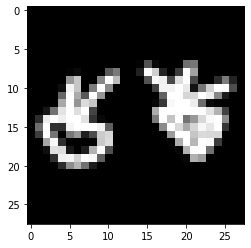

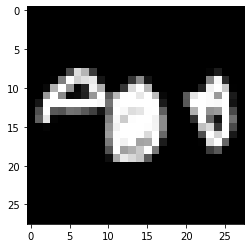

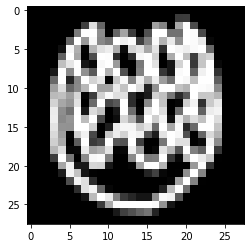

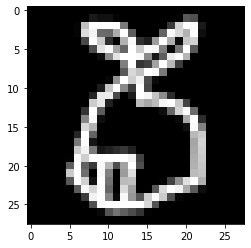

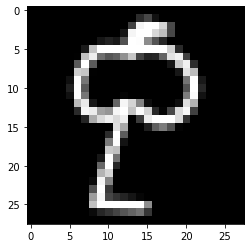

In [32]:
print('Printing 10 incorrectly classified examples:')
for i in range(10):
    plt.figure()
    plt.imshow(incorrect_class[i])
    plt.set_cmap('gray')

Create a copy of the 10 correctly-classified images and add Gaussian noise to them, with a standard deviation that is approximately one tenth of the image’s range. (For example, if the pixel values of the images range from -10 to 10, the range is 20, so you would use a standard deviation of 2.0.)

Visualize these perturbed images and classify them with your model. Select one of these images and place in in the answer box, replacing Blank.png with the image’s filename. (answer in 1.8.6)

<ipython-input-33-585b2e68efa6>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = torch.from_numpy(correct_lab[:10].astype(np.int))


tensor([ True,  True, False, False, False, False,  True, False, False, False])


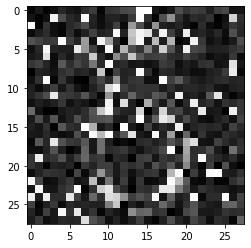

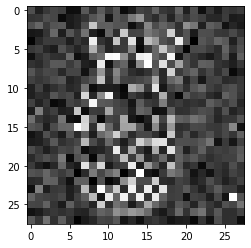

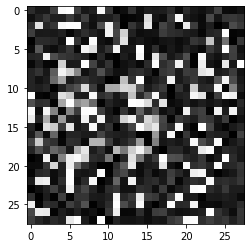

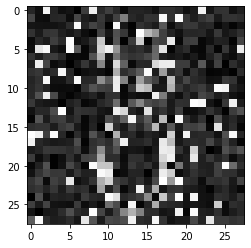

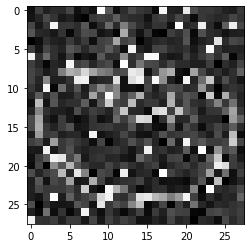

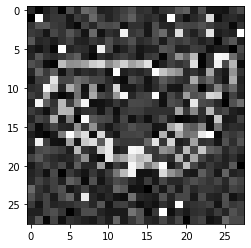

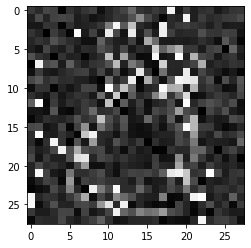

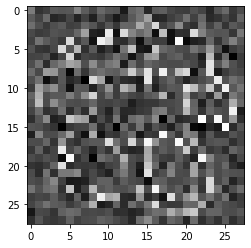

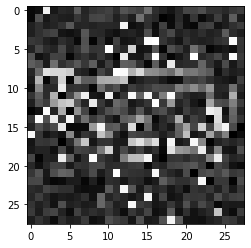

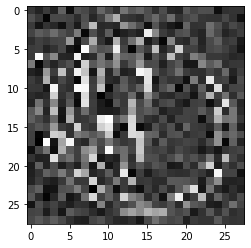

In [33]:
gaussy_noise = correct_class[:10].copy()
for i, img in enumerate(gaussy_noise):
    mean = np.mean(img)
    rnge = np.max(img) - np.min(img)
    std = rnge / 10
    gauss = np.random.normal(mean,std,(28,28)).reshape(28,28)
    gaussy_noise[i] = img + gauss

    plt.figure()
    plt.imshow(gaussy_noise[i])
    plt.set_cmap('gray')
    

x = torch.from_numpy(gaussy_noise.astype(np.float32))
y = torch.from_numpy(correct_lab[:10].astype(np.int))
logits = model(x)
loss = F.cross_entropy(logits, y)
y_pred = torch.max(logits, 1)[1]

print(y_pred == y)

Create a copy of the 10 correctly-classified images and flip them vertically.

Visualize these flipped images and classify them with your model.

tensor([False, False, False, False, False, False, False,  True, False,  True])


<ipython-input-35-0f017405a79e>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = torch.from_numpy(correct_lab[:10].astype(np.int))


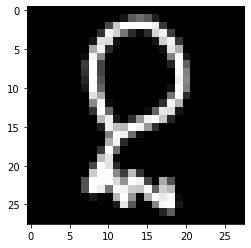

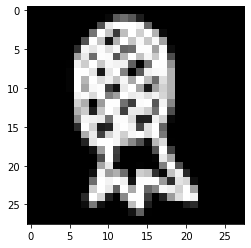

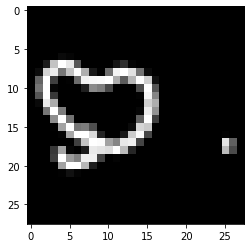

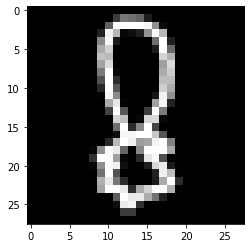

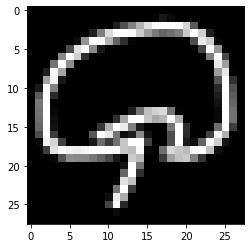

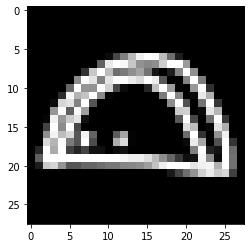

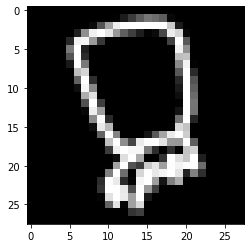

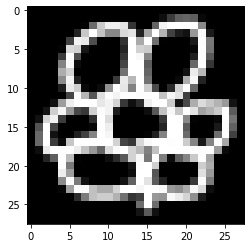

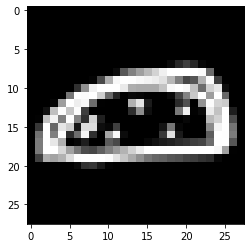

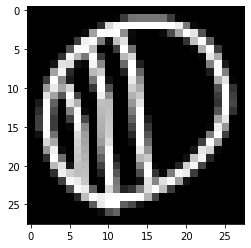

In [35]:
flipped = correct_class[:10].copy()
for i, img in enumerate(flipped):
    flipped[i] = np.flipud(img)

    plt.figure()
    plt.imshow(img)
    plt.set_cmap('gray')
    

x = torch.from_numpy(flipped.astype(np.float32))
y = torch.from_numpy(correct_lab[:10].astype(np.int))
logits = model(x)
loss = F.cross_entropy(logits, y)
y_pred = torch.max(logits, 1)[1]

print(y_pred == y)